# ECE 5020: Discrete-Time Systems - Representations, Properties, and Analysis 


## Example: Determining the Output using Convolution


In this notebook, we will implement an example of determining the output using Convolution. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# -----------------------------
# 1) Encode x[n] and h[n] exactly like the slide
# -----------------------------
# Slide: x(n) = {1,2,3,1} with n=0 at the FIRST element
# => x[0]=1, x[1]=2, x[2]=3, x[3]=1
x = {0: 1, 1: 2, 2: 3, 3: 1}

# Slide: h(n) = {1,2,1,-1} with n=0 at the "2" (second element)
# => h[-1]=1, h[0]=2, h[1]=1, h[2]=-1
h = {-1: 1, 0: 2, 1: 1, 2: -1}

def get(seq, n):
    """Safe lookup for discrete sequence stored as dict."""
    return seq.get(n, 0)


In [4]:
# -----------------------------
# 2) Slide's definition: y[n] = sum_k x[k] h[n-k]
#    and the "product sequence": v_n(k) = x[k] h[n-k]
# -----------------------------
def product_sequence(x, h, n, k_min=None, k_max=None):
    """
    Compute v_n(k) = x[k] * h[n-k] over a k-range.
    Returns dict {k: v_n(k)}.
    """
    if k_min is None:
        k_min = min(x.keys())
    if k_max is None:
        k_max = max(x.keys())

    v = {}
    for k in range(k_min, k_max + 1):
        v[k] = get(x, k) * get(h, n - k)
    return v

def convolve_dict(x, h):
    """
    Compute y[n] for all n where overlap can occur.
    Returns dict {n: y[n]}.
    """
    x_min, x_max = min(x.keys()), max(x.keys())
    h_min, h_max = min(h.keys()), max(h.keys())

    # Output support is [x_min + h_min, x_max + h_max]
    n_min = x_min + h_min
    n_max = x_max + h_max

    y = {}
    for n in range(n_min, n_max + 1):
        # Only need k where x[k] is potentially nonzero (finite support)
        v = product_sequence(x, h, n, k_min=x_min, k_max=x_max)
        y[n] = sum(v.values())
    return y

y = convolve_dict(x, h)

print("y[n] from n = -1..5:")
for n in range(min(y.keys()), max(y.keys()) + 1):
    print(f"y[{n}] = {y[n]}")

# Expected: [1, 4, 8, 8, 3, -2, -1] for n=-1..5


y[n] from n = -1..5:
y[-1] = 1
y[0] = 4
y[1] = 8
y[2] = 8
y[3] = 3
y[4] = -2
y[5] = -1


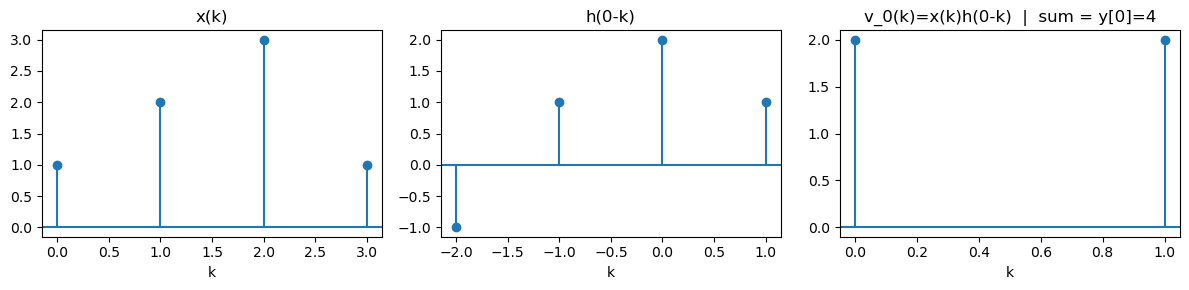

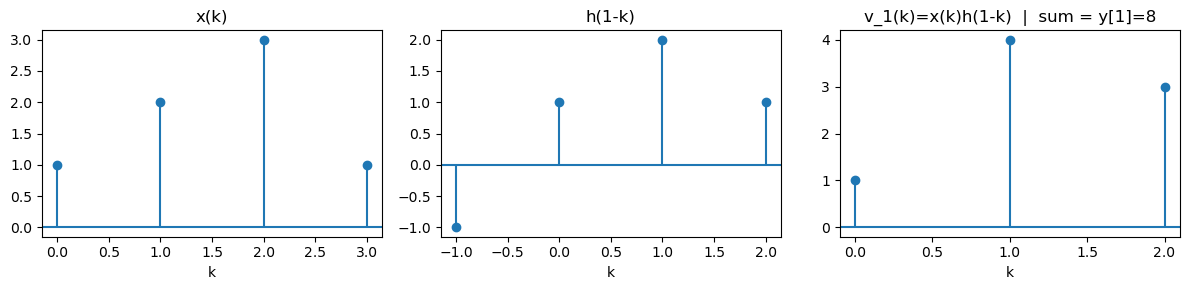

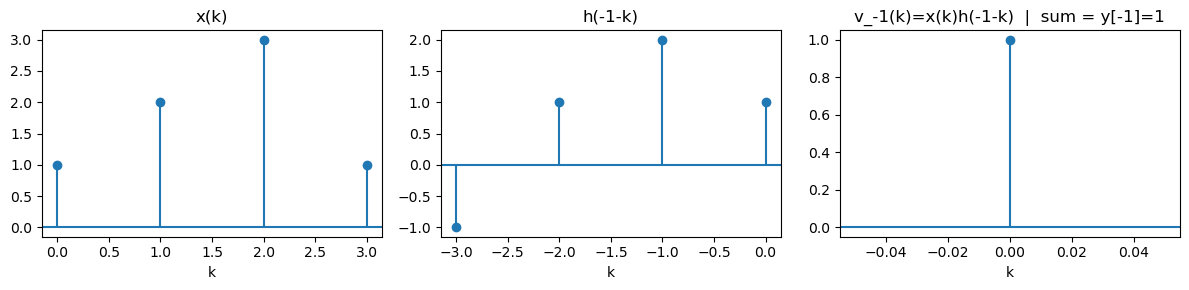

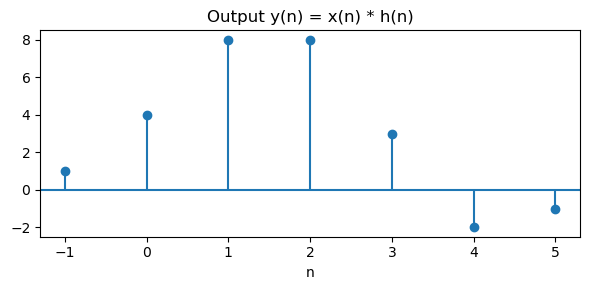

In [6]:
# -----------------------------
# 3) Optional: reproduce the slide's "fold/shift/multiply/sum" plots
# -----------------------------
def stem_dict(ax, seq_dict, title, xlabel="n"):
    """Stem-plot a dict-based sequence."""
    if not seq_dict:
        ax.set_title(title)
        return
    ns = np.array(sorted(seq_dict.keys()))
    vals = np.array([seq_dict[n] for n in ns])
    ax.stem(ns, vals, basefmt=" ")
    ax.axhline(0)
    ax.set_title(title)
    ax.set_xlabel(xlabel)

def fold_h(h):
    """Return h(-k) as a dict in the variable k."""
    return {k: get(h, -k) for k in range(-10, 11) if get(h, -k) != 0}

def shift_folded_h(h, n):
    """
    For fixed n, return sequence k -> h(n-k).
    This is the 'folded then shifted' view used in the slide.
    """
    # We'll show it over a wide enough k range for visualization.
    seq = {}
    for k in range(-10, 11):
        val = get(h, n - k)
        if val != 0:
            seq[k] = val
    return seq

def demo_for_n(n):
    """
    Make the four plots the slide conceptually shows for a fixed n:
    x(k), h(n-k), v_n(k)=x(k)h(n-k), and the sum y(n).
    """
    xk = {k: get(x, k) for k in range(-2, 8) if get(x, k) != 0}
    h_nk = shift_folded_h(h, n)
    v = product_sequence(x, h, n, k_min=min(x.keys()), k_max=max(x.keys()))
    v = {k: v[k] for k in v if v[k] != 0}

    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    stem_dict(axes[0], xk, "x(k)", xlabel="k")
    stem_dict(axes[1], h_nk, f"h({n}-k)", xlabel="k")
    stem_dict(axes[2], v, f"v_{n}(k)=x(k)h({n}-k)  |  sum = y[{n}]={y[n]}", xlabel="k")
    plt.tight_layout()
    plt.show()

# Show the same n's the slide highlights
demo_for_n(0)
demo_for_n(1)
demo_for_n(-1)

# Also plot the final y[n] lollipop output
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
stem_dict(ax, y, "Output y(n) = x(n) * h(n)", xlabel="n")
plt.tight_layout()
plt.show()


In [7]:
# -----------------------------
# 4) Sanity check with numpy.convolve (values match; indices need offset awareness)
# -----------------------------
# numpy assumes both start at index 0, so it gives the correct VALUES.
x_arr = np.array([1, 2, 3, 1])   # x[0..3]
h_arr = np.array([1, 2, 1, -1])  # represents h[-1..2] (offset by -1)
y_arr = np.convolve(x_arr, h_arr)

print("\nnp.convolve values:", y_arr)
print("These correspond to n = -1..5 (because h's '0' is its 2nd element).")


np.convolve values: [ 1  4  8  8  3 -2 -1]
These correspond to n = -1..5 (because h's '0' is its 2nd element).
